In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

\
\
<b> COMO ETAPA INICIAL, ES MOMENTO DE EXPLORAR LOS DATOS Y ENTENDER QUE SIGNIFICA CADA UNO DE LOS CAMPOS \
   
  

In [2]:
housing = pd.read_csv('train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


\
\
<B> EN ESTA ETAPA, ES IMPORTANTE IDENTIFICAR CUALES SON LAS COLUMNAS QUE TIENEN MAS VALORES DE TIPO "NULL" \
    


In [6]:
housing.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

\
\
<B>EL CONOCER LOS PRECIOS DE VENTA PROMEDIO, ASI COMO LOS PRECIOS MINIMOS, MAXIMOS Y QUANTILES, \
    NOS DARA UNA MEJOR PERSPECTIVA DE LA INFORMACION CUANDO COMENCEMOS A REALIZAR LOS ANALISIS


In [42]:
function = 'El conocer los precios de venta promedio, asi como los precios minimos, maximos y quantiles, nos dara una mejor perspectiva de la informacion cuando comencemos a realizar los analisis'
function.upper()

'EL CONOCER LOS PRECIOS DE VENTA PROMEDIO, ASI COMO LOS PRECIOS MINIMOS, MAXIMOS Y QUANTILES, NOS DARA UNA MEJOR PERSPECTIVA DE LA INFORMACION CUANDO COMENCEMOS A REALIZAR LOS ANALISIS'

In [8]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

\
\
<B> LA SIGUIENTE ETAPA CORRESPONDE A LA LIMPIEZA DE LA DATAFRAME, CON LA INTENCION DE PREPARAR DATOS PARA ANALIZAR \
PARA ELLO CREAREMOS UNA FUNCION QUE NOS AYUDE CON LA LIMPIEZA DE DATOS Y LA REDUCCION DE COLUMNAS POCO SIGNIFICATIVAS

Se identificaron varias columnas que eran de tipo categoricas y cuyas calificaciones coincidian en todas estas \
por lo anterior se opto en asignar valores por convencion para poder usar numeros en todas estas. A continuacion las columnas 

ExternQual, ExternCond, BsmtQual, HeatingQC, KitchenQual, Fireplaces, GarageQual, GarageCond, PoolQC

Ex = Excellent = 9 \
Gd = Good = 7\
TA = Average/Typical = 5\
Fa = Fair = 3\
Po = Poor = 2\
NA = -1 

A continuacion la funcion de limpieza

In [43]:
def df_cleaner(std_values_df):
    
    std_values_df.replace(['Ex','Gd','TA','Fa','Po','NA'], [9,7,5,3,2,-1], inplace = True)
    
    std_values_df.replace(0, np.nan, inplace = True)
    
    std_values_df.dropna(axis = 'columns', thresh = int(std_values_df.shape[0]*0.5), inplace = True)
    
    std_values_df.set_index(['Id'], inplace = True)
    
    std_values_df.dropna(thresh = 60, inplace = True)
    
    std_values_df.dropna(subset=['YrSold','YearBuilt'], inplace = True)
    
    std_values_df.fillna(0, inplace = True)
    
    return std_values_df


In [11]:
cleaning_housing_df = df_cleaner(housing)

In [12]:
housing_nvalues = cleaning_housing_df.select_dtypes(include ='number')
housing_nvalues.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,OpenPorchSF,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,7,5,7.0,...,0.0,2003.0,2.0,548.0,5.0,5.0,61.0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,5,5,7.0,...,5.0,1976.0,2.0,460.0,5.0,5.0,0.0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,7,5,7.0,...,5.0,2001.0,2.0,608.0,5.0,5.0,42.0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,5,5,5.0,...,7.0,1998.0,3.0,642.0,5.0,5.0,35.0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,7,5,7.0,...,5.0,2000.0,3.0,836.0,5.0,5.0,84.0,12,2008,250000


In [13]:
housing_nvalues.shape

(1181, 33)

In [14]:
housing_nvalues.corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.776806
GrLivArea       0.699616
ExterQual       0.666072
GarageCars      0.649928
KitchenQual     0.643539
BsmtQual        0.629691
GarageArea      0.609473
TotalBsmtSF     0.583843
1stFlrSF        0.583640
FullBath        0.555132
TotRmsAbvGrd    0.546300
YearRemodAdd    0.486521
YearBuilt       0.473131
GarageYrBlt     0.460035
FireplaceQu     0.444027
HeatingQC       0.400526
Fireplaces      0.382486
BsmtFinSF1      0.335162
OpenPorchSF     0.276236
LotArea         0.247229
BsmtUnfSF       0.210122
LotFrontage     0.199837
BedroomAbvGr    0.146087
BsmtCond        0.128966
GarageQual      0.113150
GarageCond      0.084462
MoSold          0.043854
YrSold         -0.014085
ExterCond      -0.021087
KitchenAbvGr   -0.104808
MSSubClass     -0.105587
OverallCond    -0.122286
Name: SalePrice, dtype: float64

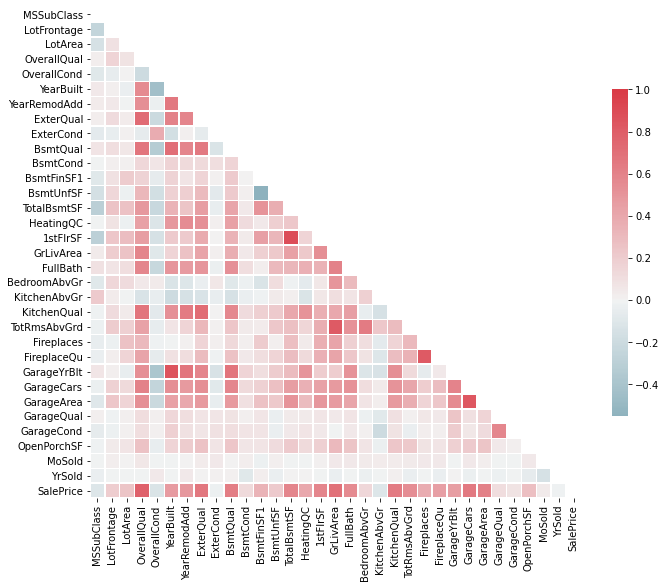

In [15]:
#Let's make a new visualization to see this partial result
#Construyendo una ayuda visual de tipo heatmap para ver los resultados parciales

corr = housing_nvalues.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()

\
\
<b> DE NUESTRA CORRELACION EFECTUADA ANTERIORMENTE, TOMAREMOS PARA REALIZAR UNA REGRESION LINEA LAS COLUMNAS \
CUYOS VALORES ESTAN ARRIBA DEL 0.6 YA QUE SE PUEDE PRESUMIR QUE ESTOS DATOS SI TIENEN SIGNIFICANCIA SOBRE EL \
PRECIO DE VENTA

In [48]:
corr_hous = housing_nvalues[['OverallQual','GrLivArea','ExterQual','GarageCars','KitchenQual','BsmtQual','GarageArea']]

In [49]:
X = sm.add_constant(corr_hous)
y = housing_nvalues['SalePrice']
reg_linear_mod = sm.OLS(y,X).fit()
predict = reg_linear_mod.predict(X)
print(reg_linear_mod.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     511.8
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        05:27:05   Log-Likelihood:                -14180.
No. Observations:                1181   AIC:                         2.838e+04
Df Residuals:                    1173   BIC:                         2.842e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.522e+05   6662.673    -22.838      

DE NUESTRO ANALISIS DE REGRESION, SE LOGRA APRECIAR UN VALOR DE CASI 0.8 LO CUAL NO ES MALO, \
POR LO QUE SE PUEDE DECIR QUE SI ESTA EXPLICANDO BIEN EL MODELO. \
AL TRATARSE DE UNA REGRESION MULTIPLE, ES IMPORTANTE EVALUAR EL VALOR DE "r". ESTE VALOR ESTA \
MUY CERCANO AL R2 (0.752), LO CUAL INDICA QUE UNA BUENA PARTE DE LA VARIABILIDAD EN LA SALIDA \
DEL MODELO SE ESTA EXPLICANDO. \
EL ESTADISTICO-F TIENE UN VALOR MODERADAMENTE ELEVADO, \LO QUE NOS DICE QUE TIENE BUEN NIVEL DE \
SIGNIFICACIA EL MODELO \
POR ULTIMO, SE ANALIZA EL P-VALUE DE LAS COLUMNAS DEL MODELO Y SE LOGRA VER QUE LOS VALORES \
ESTAN MUY CERCANOS A CERO, LO CUAL ES BUEN INDICADOR DE QUE TENEMOS BUEN MODELO.

\
\
<b> A CONTINUACION UTILIZAREMOS COMPONENTES NUMERICOS PARA PREDECIR EL PRECIO DE COMPRA

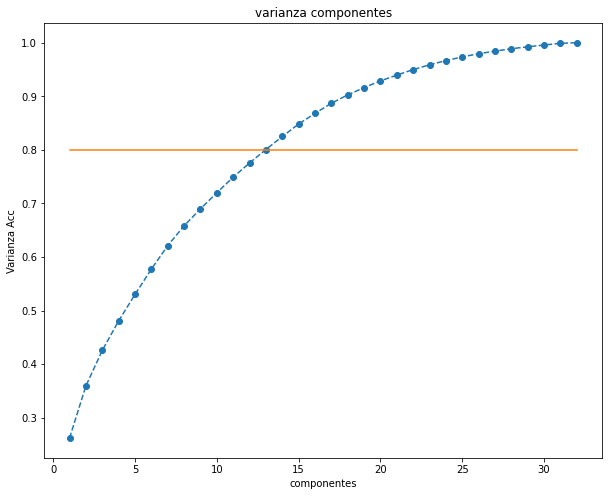

In [63]:
X_train = housing_nvalues.drop('SalePrice', 1)
y_train = housing_nvalues.drop('SalePrice', 1)

pca = PCA()

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pca.fit_transform(X_train)

plt.figure(figsize = (10,8))
plt.plot(range(1,33), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.plot(range(1,33), [.8]*32)
plt.title("varianza componentes")
plt.xlabel("componentes")
plt.ylabel("Varianza Acc");

In [72]:
X_train = housing_nvalues.drop('SalePrice', 1)
y_train = housing_nvalues['SalePrice']
pca = PCA(n_components = 15)
sc = StandardScaler()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pca.fit_transform(X_train)

df_pca_comp = pd.DataFrame (data = pca.components_,
                            columns = housing_nvalues.drop('SalePrice', 1). columns.values,
                            index = [f'componente principal {i}' for i in range(1,16)]
                           )
df_pca_comp

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,OpenPorchSF,MoSold,YrSold
componente principal 1,-0.017900,0.074416,0.060408,0.291026,-0.106641,0.245617,0.232556,0.276007,-0.025915,0.268683,...,0.111612,0.147769,0.249105,0.270955,0.253939,0.054380,0.047914,0.119285,0.015871,-0.004075
componente principal 2,-0.123906,0.129076,0.221628,-0.003942,0.104056,-0.298989,-0.228503,-0.104998,0.070636,-0.159382,...,0.293341,0.236723,-0.296905,0.003512,0.031115,-0.078907,-0.100173,0.042386,0.042217,-0.023122
componente principal 3,-0.245507,0.029044,0.185583,-0.025134,0.072194,0.000939,-0.044884,-0.023919,0.075895,0.006438,...,0.181084,0.109126,-0.041936,-0.044740,0.053261,0.169384,0.204820,-0.046942,-0.055349,0.054040
componente principal 4,0.140674,-0.207779,-0.021549,0.071035,0.375907,-0.055483,0.116713,0.024572,0.376164,-0.033410,...,0.198511,0.181254,-0.010715,-0.069628,-0.087041,0.357393,0.364846,0.084731,0.059167,-0.031740
componente principal 5,-0.435289,0.345391,-0.004943,-0.078802,0.207412,-0.048435,0.049201,-0.045046,0.246506,-0.112052,...,-0.392777,-0.372400,0.025998,0.033605,0.128483,0.186743,0.238548,0.079627,-0.003408,0.013324
componente principal 6,0.249570,-0.014500,0.065533,-0.097227,-0.234884,0.078540,-0.117927,-0.137830,-0.143356,0.010053,...,-0.168305,-0.256368,0.136909,0.119023,0.167392,0.348915,0.285492,0.016099,-0.032555,-0.045416
componente principal 7,-0.125613,-0.027974,-0.015885,0.008704,-0.325101,0.053666,-0.178844,-0.068773,-0.305893,-0.019659,...,0.203836,0.251845,0.050975,-0.014911,-0.028122,0.344613,0.359502,-0.142681,0.010581,-0.116152
componente principal 8,0.025074,0.028322,0.004627,-0.007156,-0.070708,0.005739,-0.084214,-0.015499,0.059192,0.007181,...,-0.015188,0.001017,-0.008262,0.051055,0.046539,-0.046026,-0.044109,0.178897,0.573023,-0.673114
componente principal 9,0.290295,-0.316725,-0.195947,0.005624,0.113598,-0.133858,-0.004016,0.028436,0.252572,-0.069004,...,-0.003531,0.000153,-0.044487,0.035140,0.081647,0.193637,0.037855,0.130392,0.000570,0.104990
componente principal 10,-0.043388,0.008510,-0.070768,0.034739,-0.025824,-0.038237,0.059753,0.086252,-0.024400,-0.024655,...,-0.060851,-0.071971,-0.040295,-0.116169,-0.071136,0.045195,0.003459,0.327027,0.462116,0.026561


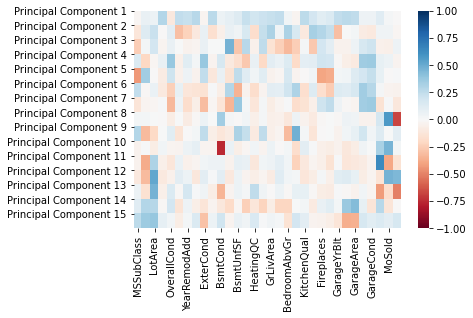

In [82]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = False
           )
plt.yticks(list(range(15)),
           [f'Principal Component {i}' for i in range (1,16)]
            ); 